In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Parametric versus nonparametric tests



A parametric test is a test that uses some known set of parameter estimates (mean and standard deviation, for example) to represent the information in the data. When a variable has a mathematically understood distribution (like Gaussian, binomial, or Poisson), it can be accurately summarized using a few parameters, so a parametric test makes sense. For example, a t-test is considered a parametric test because it assumes normality in samples and populations. 

For variables that don't conform to a distribution type, their information can't be summarized in just a few parameters, and representing them with these types of parameters would be misleading (like taking the mean of a very skewed distribution). For these types of variables, nonparametric tests are used. These tests rely on other estimates that represent certain pieces of information within a variable (like the median, which describes the middlemost data point when a variable is sorted by size), but not the whole variable. 

Because the estimates that they use contain less information than parametric estimates, nonparametric tests can't detect very small effects as well as parametric tests, but they are also less vulnerable to bias from extreme observations in the data.



## Formally testing for normality with Shapiro-Wilk

Before getting into these more exotic tests, start with something that you're familiar with: checking whether two samples are each normally distributed.

Practice on the famous [*Iris flower* dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


In [0]:
iris = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/iris.data",
                  names = ["sepal_length","sepal_width","petal_length","petal_width","species"])

iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


For this analysis, you will be comparing statistics of three species of iris flower: `Iris-setosa`, `Iris-versicolor`, and  `Iris-virginica`. 

You can get a record count for each group by chaining the `groupby()` and `agg()` methods:

In [0]:
iris.groupby(['species']).agg(['count'])

,sepal_length,sepal_width,petal_length,petal_width
,count,count,count,count
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


At only 50 observations per group, this is a pretty small sample—about as small as you'd want to go with conducting inferential statistics.


## Testing for normality

Earlier, you tested a distribution's normality by plotting it as well as evaluating its skewness and kurtosis. Now, add one more technique: the Shapiro-Wilk test. This is a statistical test used to infer whether a variable's distribution is significantly different than normal. 

This is the formula for the Shapiro-Wilk test statistic, $W$:

\begin{align} 
W=\frac { (\sum_{i=1}^n a_ix_{(i)} )^2}{ \sum_{i=1}^n (x_i-\bar{x})^2}
\end{align}

$x_{(i)}$ is the i-th smallest number in the sample.  
$a_i$ is a constant determined by the sample size; it acts as a scaling value.  
$\bar{x}$ is the sample mean.  
$x_i$ is the i-th observation in the sample.  

The equation above computes the ratio between two values: The numerator is the value that would be expected for a normally distributed sample of that size containing that much information. And the denominator is the actual sum of the differences between each of the values in the variable and the sample mean (the denominator). Values close to `1` indicate that the distribution is similar to a normal distribution. The smaller the W-statistic becomes, the more divergence there is between the distribution of the data and the normal distribution. The Shapiro-Wilk test also provides a p-value; a p-value under `0 .05` indicates non-normality at the 95% confidence level.

The Shapiro-Wilk test (and all other tests of non-normality) comes with an important caveat: it's very sensitive to sample size. Shapiro-Wilk performs particularly well for sample sizes below 50, and can be used for sample sizes up to 2,000. But for larger sample sizes, the test will detect even very small and unimportant deviations from non-normality; as such, other tests are recommended for larger sample sizes. It is also good practice that any statistical tests of normality should always be accompanied by visualizations, such as histograms or QQ plots, or other methods that will help the user validate the tests.

Now, practice by evaluating the distributions of `sepal_width` in `Iris-versicolor` and `Iris-virginica`. You can plot the histograms as normal:

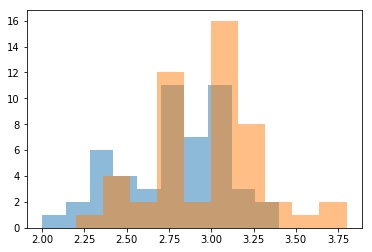

DescribeResult(nobs=50, minmax=(2.0, 3.4), mean=2.7700000000000005, variance=0.09846938775510206, skewness=-0.3518674965401782, kurtosis=-0.44827189991677496)
DescribeResult(nobs=50, minmax=(2.2, 3.8), mean=2.974, variance=0.10400408163265305, skewness=0.35487781319939127, kurtosis=0.5197659354955646)


In [0]:
versicolor = iris[iris['species'] == 'Iris-versicolor']

virginica = iris[iris['species'] == 'Iris-virginica']


plt.hist(versicolor['sepal_width'], alpha = .5)
plt.hist(virginica['sepal_width'], alpha = .5)
plt.show()

print(stats.describe(versicolor['sepal_width']))
print(stats.describe(virginica['sepal_width']))

The distributions don't look perfectly bell-shaped, but remember that you are dealing with very small sample sizes, so the histogram is going to be sparse. Skewness and kurtosis seem to check out for normality. 

Now, conduct one more normality check: Shapiro-Wilk. You can use [`shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) from scipy.stats.

In [0]:
print(stats.shapiro(versicolor['sepal_width']))
print(stats.shapiro(virginica['sepal_width']))

(0.9741330742835999, 0.33798879384994507)
(0.9673910140991211, 0.1809043288230896)


Each p-value is greater than `0.05`, and $W$ is close to `1`. Great! It appears that each is normally distributed.

## Comparing multiple normally distributed groups

You could continue this analysis by conducting a t-test, but you're already a pro at that. Instead, bring in the third iris species and compare them all at once. 

A handy way to list the unique values in a DataFrame column is the `unique()` method:

In [0]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

`Iris-setosa` is the third category, so create a `setosa` DataFrame for ease of analysis, print the descriptive and inferential statistics for normality, and add it to your plot:

DescribeResult(nobs=50, minmax=(2.3, 4.4), mean=3.418, variance=0.1451795918367347, skewness=0.1038140820747848, kurtosis=0.6851340609499261)
(0.968691885471344, 0.20465604960918427)


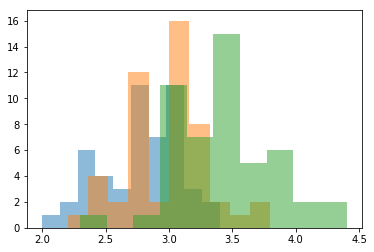

In [0]:
setosa = iris[iris['species'] == 'Iris-setosa']

print(stats.describe(setosa['sepal_width']))
print(stats.shapiro(setosa['sepal_width']))


plt.hist(versicolor['sepal_width'], alpha = .5)
plt.hist(virginica['sepal_width'], alpha = .5)
plt.hist(setosa['sepal_width'], alpha = .5)
plt.show()



Great! Each species is normally distributed. However, the overlapping histograms are getting hard to read. You can create a series of histograms for each category by adding the `by` argument to `hist()`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3eba9eda0>,
      dtype=object)

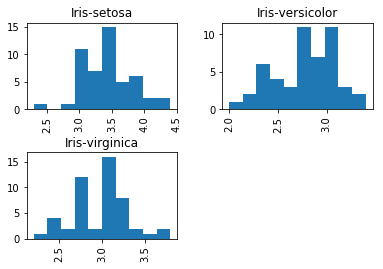

In [0]:
iris['sepal_width'].hist(by = iris['species'])

Another option for simultaneously comparing the frequencies of multiple groups is with a box plot: 

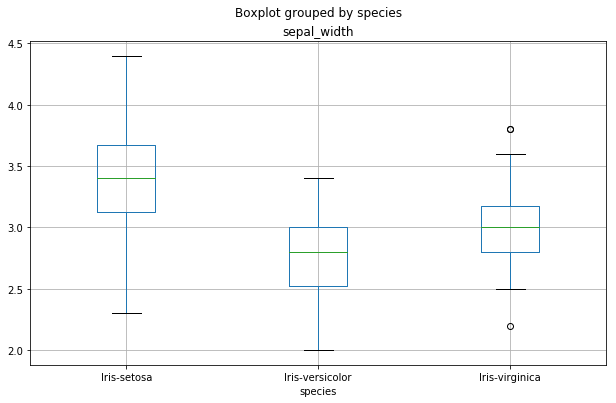

In [0]:
# Sepal width is normally distributed


# Create a box plot
iris.boxplot('sepal_width', by='species', figsize=(10, 6))

## Comparing multiple groups

Although none of the three distributions look very pretty on a histogram, they are sufficiently close to the normal distribution (given the small sample size) that the mean and standard deviation would provide useful information. 

You are now comparing three unrelated independent samples of data. The appropriate parametric choice is a one-way analysis of variance (ANOVA). 

### One-way ANOVA

The one-way ANOVA's test statistic, called $F$, will identify whether any of the groups differs from the others. 

The F-test alone *cannot* say which group (or groups) are the different ones.

\begin{equation}
F=\frac{{n\sum(\bar{Y}_j-\bar{Y})^2}/{(a-1)}}{{\sum\sum(Y_{ij}-\bar{Y}_j)^2}/{(N-a)}}
\end{equation}

$n$ is the number of data points in each group.  
$\bar{Y}_j$ is the mean for the j-th group.  
$\bar{Y}$ is the overall mean.  
$Y_{ij}$ is the i-th value of j-th group.  
$a$ is the number of groups.  
$N$ is the total number of data points.  

The logic of the one-way ANOVA is to compare the variance between group means $\bar{Y}_j$ and the overall mean $\bar{Y}$ with the variance between observations within each group $Y_{ij}$ and the mean of that group $\bar{Y}_j$. This ratio is known as the *F-score*. 

The F-score is used to calculate the probability of getting a difference that large in the sample if there were no meaningful difference between the groups in the population. 

This is called a *one-way* ANOVA because you are analyzing the difference in *one* variable. If you were analyzing differences in more than one variable, you would use another test.

You can conduct a one-way ANOVA using [`scipy.stats.f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

In [0]:
stats.f_oneway(setosa['sepal_width'], versicolor['sepal_width'], virginica['sepal_width'])

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

Like `ttest_ind()`, `f_oneway()` returns a test statistic, or F-value, as well as a p-value. You can compare the p-value against the desired alpha (usually `0.05`) to determine statistical significance. It appears that the three species are likely to differ in the population (`p < 0.0001`). 

But which group is the odd one out? 

Returning to the charts above, visual inspection suggests that the setosa species has a wider sepal width than versicolor or virginica. To formally test this, you can perform a set of pairwise t-tests comparing each group.



In [0]:
print(stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width']))
print(stats.ttest_ind(setosa['sepal_width'], virginica['sepal_width']))
print(stats.ttest_ind(versicolor['sepal_width'], virginica['sepal_width']))

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)
Ttest_indResult(statistic=6.289384996672061, pvalue=8.916634067006443e-09)
Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)


### Multiple testing correction: Tukey's honest significant differences (HSD) test


Instead of running many pairs of t-tests to find out which species is the odd one out, you could run a Tukey's HSD test. Unlike a t-test, Tukey's HSD test does pairwise tests that use a variability estimate based on variability from all the groups combined (the denominator from the F-test above) rather than variability from only the two groups being tested. 

\begin{equation}
Q=\frac{M_i-M_j}{\sqrt{MSE/n}}
\end{equation}

Here, $MSE ={\sum\sum(Y_{ij}-\bar{Y}_j)^2}/{(N-a)}$ from the denominator of the F-test above. MSE is known as the *mean square error*.

In addition, when calculating the probability of getting this ratio, the test statistic $Q$ will be evaluated in light of a modified probability distribution that takes into account the number of means being tested across all pairwise tests.

Running Tukey's HSD using Python's `statsmodels` package will produce a table with the differences between each pair of means, the upper and lower bounds of that difference estimate, and whether you should reject the null hypothesis that each pair of groups isn't different.

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = iris['sepal_width'],      # Data
                          groups = iris['species'],   # Groups
                          alpha=0.05)         # Significance level


In [0]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.001,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.001,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0089,0.0428,0.3652,True


### Multiple groups and type I errors

You may be wondering why you would go through all this trouble when you could just do a bunch of t-tests comparing the groups. The reason for doing an ANOVA first, and following-up with post-hoc tests if the F-test suggests differences, is to prevent false positive results (also called *type I errors*).

As you've read several times by now, data scientists often use a probability threshold of 5% (`p = 0.05`) to determine whether the groups that you are comparing in your sample are meaningfully different in the population (though the use of this threshold, and even the existence of a threshold at all, is widely debated). One way of interpreting that threshold is that if there were no real difference between the groups in the population, you would see differences like those in your sample less than 5% of the time. To put it another way, this threshold means that you have a 1-in-20 chance of a false positive. In other words, there's a 1-in-20 chance of claiming that there is a real difference when in fact, there is not.

This 1-in-20 chance, however, only holds when you have done exactly one statistical test on the data. If you perform two statistical tests on the same data, the chances of getting a false positive on at least one of them are now 1 in 10: (1/20 + 1/20). If you were to perform 200 tests on the same data, it would be likely that up to 10 of your tests would be false positives.

As a data scientist, you want to be confident that your conclusions accurately reflect the population. There are various multiple-test correction methods that can be used to keep chances of a false positive below the 5% threshold. One is Tukey's HSD test, which uses information about the overall sample variance and the number of groups being compared in order to raise the bar on how large a group difference must be before it passes the 5% probability threshold.

There are many methods, some specific to certain types of analysis, and others representing more general approaches suitable for many different statistical goals. For a review of decision points involved in selecting a correctional approach, check out the *Nature Biotechnology* article [How does multiple testing correction work?](https://www.nature.com/articles/nbt1209-1135).

### Paired t-tests for dependent groups 

So far, you have assumed that the groups that you are comparing are made up of different people. Sometimes, however, you want to compare people to themselves, to see if changing an element (such as the color of a website or the text of an email) changes peoples' reactions. This type of data leads to *dependent groups*; if you know a person's response to condition A, you already have some information about how they might respond to condition B. As a result, different statistical methods are needed if you want to compare condition A to condition B.

A paired t-test is used to compare two dependent (or *paired*) groups. The difference score is calculated by subtracting each pair of scores and then calculating the mean difference, rather than calculating the difference in the means. 

In a paired t-test, if a person is missing data at either of the two time points, their condition is discarded. 

To see how this works, read in a dataset recording blood pressures for 120 patients, taken before and after an intervention.



In [0]:
bp = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv")
bp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
patient      120 non-null int64
sex          120 non-null object
agegrp       120 non-null object
bp_before    120 non-null int64
bp_after     120 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


The null hypothesis for the paired t-test is that the mean difference between time points is equal to zero. 

The paired t-test assumes normality on the raw values: `bp_before` and `bp_after`.

DescribeResult(nobs=120, minmax=(-41, 45), mean=5.091666666666667, variance=279.34446778711487, skewness=-0.06267900990911217, kurtosis=-0.12080508546952107)


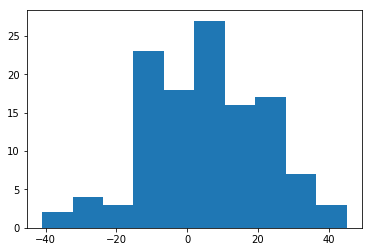

In [0]:
bp['bp_difference'] = bp['bp_before'] - bp['bp_after']

plt.hist(bp['bp_difference'])

print(stats.describe(bp['bp_difference']))

Normality is assumed, so to test this difference, use [`ttest_rel()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) from scipy.stats. 

In [0]:
stats.ttest_rel(bp['bp_before'], bp['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

Going by the p-value, the findings are significant. The difference in means is significantly different from zero.

## Nonparametric tests

If a visual inspection of the data (potentially in combination with the Shapiro-Wilk test) shows that the data is meaningfully non-normal, then any statistics that assume normality will give results that are biased or just straight-up wrong. 

Fortunately, there are nonparametric versions of all common statistical methods. Nonparametric methods are less powerful (given the same sample size, a parametric test will be able to detect smaller trends in the data), which is why they aren't used all the time. 

Generally speaking, a nonparametric test works by first converting variable values into rankings, from the lowest value (first place) to the highest value (last place). Here is an example of a height-in-inches variable, in its original scale and when converted into ranks:

|Height|Height|
|---|---|
|Inches		|Ranks|
|	60	|	4|
|	57	|	3|
|	72	|	7|
|	55	|	2|
|	51	|	1|
|	66	|	5|
|	69	|	6|

Once the variable values are converted into ranks, statistical tests are performed on the ranks. 


For an example, compare the distributions by species for the `petal_width` variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3ea3c1da0>,
      dtype=object)

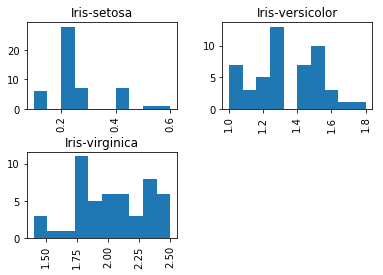

In [0]:
iris['petal_width'].hist(by = iris['species'])

Simply by looking at the visualizations, this variable doesn't appear normally distributed. You will need to conduct a nonparametric test. 

### Kruskal-Wallis test

The Kruskal-Wallis test is used for two or more groups. Although this test is a bit complicated, the underlying logic is the same as the one-way ANOVA that you learned about earlier. First, compute an estimate of the size of the differences between the groups. Then put that difference into context by dividing it by the amount of variance in the groups.

\begin{equation}
H=(N-1)\frac{\sum_{i=1}^gn_i(\bar{r}_i-\bar{r})^2}{\sum_{i=1}^g\sum_{j=1}^{n_i}(r_{ij}-\bar{r})^2}
\end{equation}

$H$ is the test statistic.  
$n_i$ is the number of data points in group *i*.  
$r_{ij}$ is the rank of data point *j* in group *i* when ranked among all data points in all groups.  
$N$ is the total number of data points.  
$\bar{r}_i$ is the average rank of all data points in group *i*.  
$\bar{r}$ is the average of all the ranks, and can be calculated as $\frac{12}{N+1}$.  


This test works by first converting all the data into ranks from `1` (the highest value) to $N$ (the  lowest value). Then the overall average rank $\bar{r}$ is subtracted from the average rank for each group $\bar{r}_i$. For each group, the difference is squared, then multiplied by the size of the group $n_i$. Finally, the scaled squared differences are summed to create the numerator. This provides information on how different the mean ranks for each group are from one another.

Then, for each observation within a group, the average overall rank $\bar{r}$ is subtracted from the rank of each observation $r_{ij}$. This difference is squared and summed. Finally, the group-level sums are added together to create the denominator. This indicates how much variability there is within each group, which is then pooled to create an estimate of the variance of the sample.

The test statistic $H$ represents the ratio of the divergence of each group mean rank from the overall mean rank relative to the variance in ranks within each group, multiplied by the size of the sample $N-1$. The larger the value of $H$, the more likely it is that one of the groups differs meaningfully from the others in the population. The test does not indicate which samples are larger or by how much.

You will conduct this test using [`kruskal()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) from scipy.stats.


In [0]:
stats.kruskal(setosa['petal_width'], virginica['petal_width'],versicolor['petal_width'])

KruskalResult(statistic=131.09335318823713, pvalue=3.415387999117524e-29)

Based on the p-value, you can reject the null that all variables have the same distribution.

### Wilcoxon signed-rank test

This is a dependent or paired test for samples that are not normally distributed.

As the name implies, the Wilcoxon signed-rank test uses ranked values to test whether the difference in pairs follows a symmetric distribution around zero. More succinctly, the null is that the median difference between pairs of observations is zero.

Now, try on a sample of cortisol readings in the morning and the evening. These readings are from [StatsGuru](https://statsguru.bham.ac.uk/downloads).

In [0]:
cortisol = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/wilcoxon-matched-pairs-data.csv")
cortisol.head()


,cortisol_morning,cortisol_evening
0,33.26,12.44
1,7.37,2.55
2,18.83,6.34
3,62.70,34.89
4,7.10,3.55


You can confirm visually these are not normally distributed: 

(array([9., 2., 4., 1., 0., 2., 0., 0., 0., 2.]),
 array([ 1.21 ,  4.578,  7.946, 11.314, 14.682, 18.05 , 21.418, 24.786,
        28.154, 31.522, 34.89 ]),
 <a list of 10 Patch objects>)

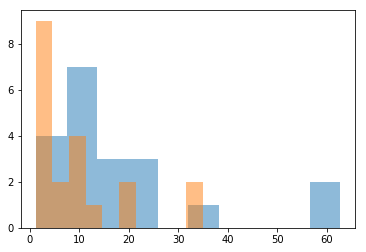

In [0]:
plt.hist(cortisol['cortisol_morning'], alpha = .5)
plt.hist(cortisol['cortisol_evening'], alpha = .5)


Run the rest with [`wilcoxon()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) from scipy.stats.

In [0]:
stats.wilcoxon((cortisol['cortisol_morning']-cortisol['cortisol_evening']))

WilcoxonResult(statistic=13.0, pvalue=0.0005934167947217433)

The median difference between pairs of observations is significantly different from zero.

## Recap

This lesson served as an introduction to comparing groups when the assumptions of a t-test aren't met. 

Here is a recap of when to use each test:

<table border="1">
<tr>
<th>Experiment type</th>
<th colspan="2">Normally distributed</th>
<th colspan="2">Non-normally distributed</th>
</tr>
<tr>
<th></th>
<th>Test</th>
<th>Function</th>
<th>Test</th>
<th>Function</th>
</tr>
<tr>
<td>A/B test with two independent groups</td>
<td>t-test for independent samples</td>
<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind"><code>scipy.stats.ttest_ind()</code></a></td>
<td>Mann-Whitney U test<br>
Mood's median test<br>
Kruskal-Wallis Test</td>

 <td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu"><code>scipy.stats.mannwhitneyu()</code></a><br><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html#scipy.stats.median_test"><code>scipy.stats.median_test()</code></a>
<br><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal"><code>scipy.stats.kruskal()</code></a>
</td>
</tr>
  
<tr>
<td>A/B/C/ ... test with three or more independent groups</td>
<td>One-way ANOVA</td>
  
<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway"><code>scipy.stats.f_oneway()</code></a></td>
<td>Mood's median test<br>
Kruskal-Wallis test<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html#scipy.stats.median_test"><code>scipy.stats.median_test()</code></a>
<br><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal"><code>scipy.stats.kruskal()</code></a>
</td>


</tr>
<tr>
<td>A/B test where all participants experience both versions</td>
<td>t-test for paired samples</td>
<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel"><code>scipy.stats.ttest_rel()</code></a></td>
<td>Wilcoxon signed-rank test</td>
<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon"><code>scipy.stats.wilcoxon()</code></a></td>
</tr>
</table>

